In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# For reproducibility
np.random.seed(42)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY50_all.csv to NIFTY50_all.csv


In [5]:
df = pd.read_csv('NIFTY50_all.csv')

# Display first few rows to check the data
print(df.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN           9859619.0   
1  893.90  941.38   4581338  4.312765e+14     NaN           1453278.0   
2  884.20  888.09   5124121  4.550658e+14     NaN           1069678.0   
3  921.55  929.17   4609762  4.283257e+14     NaN           1260913.0   
4  969.30  965.65   2977470  2.875200e+14     NaN            816123.0   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

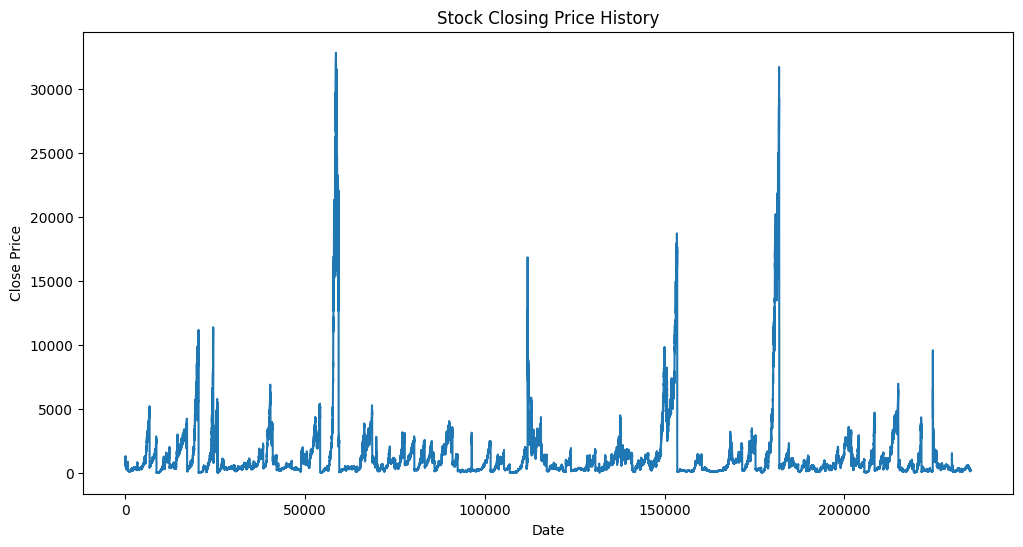

In [6]:
# Plot the closing price history to visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with forward fill method or drop them
df.fillna(method='ffill', inplace=True)


Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64


<ipython-input-7-11ab5bc6c36a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
# Choose only the closing price as a feature for this analysis
data = df.filter(['Close']).values

# Define the amount of past data (lookback window)
lookback_window = 60

# Scaling the data to the range (0,1) for faster convergence during training
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create data sequences for training
train_data = []
train_labels = []

for i in range(lookback_window, len(scaled_data)):
    train_data.append(scaled_data[i - lookback_window:i, 0])
    train_labels.append(scaled_data[i, 0])

# Convert lists to NumPy arrays
train_data, train_labels = np.array(train_data), np.array(train_labels)

# Reshape data for LSTM input (samples, time steps, features)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))


In [9]:
# Building the LSTM model
model = Sequential()

# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding a fully connected layer (dense layer)
model.add(Dense(units=25))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model (use a small batch size and enough epochs)
history = model.fit(train_data, train_labels, batch_size=64, epochs=20)


Epoch 1/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 283s 76ms/step - loss: 2.0264e-04
Epoch 2/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 322s 76ms/step - loss: 9.5800e-05
Epoch 3/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 283s 77ms/step - loss: 8.1921e-05
Epoch 4/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 318s 76ms/step - loss: 8.0427e-05
Epoch 5/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 321s 76ms/step - loss: 8.5537e-05
Epoch 6/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 325s 76ms/step - loss: 7.8171e-05
Epoch 7/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 321s 76ms/step - loss: 6.7683e-05
Epoch 8/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 324s 77ms/step - loss: 8.3224e-05
Epoch 9/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 318s 76ms/step - loss: 6.3951e-05
Epoch 10/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 284s 77ms/step - loss: 6.8900e-05
Epoch 11/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 283s 77ms/step - loss: 7.1956e-05
Epoch 12/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 315s 75ms/step - loss: 6.7752e-05
Epoch 13/20
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 325s 76ms/step - loss: 6.4831e-05
Epoch 14

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


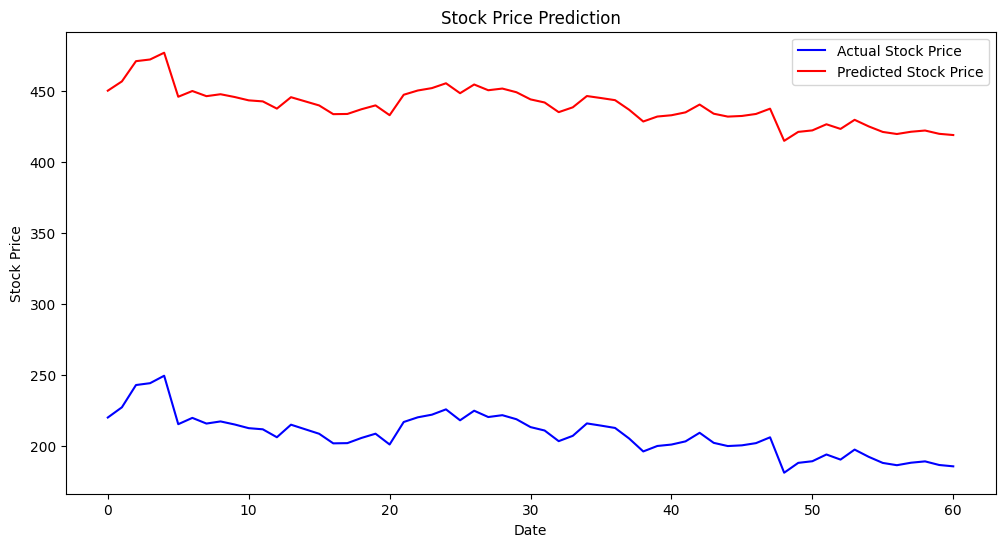

In [11]:
# Create the test data sequence for prediction
test_data = scaled_data[-(lookback_window + 1):]

# Convert the test data into a format suitable for LSTM input
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))

# Perform prediction using the trained model
predicted_stock_price = model.predict(test_data)

# Inverse the scaling to get the actual stock price
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data[-len(predicted_stock_price):], color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [12]:
# Evaluate model using Mean Squared Error (MSE)
mse = mean_squared_error(data[-len(predicted_stock_price):], predicted_stock_price)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 53557.60101109637
